## Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#### Importing Important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Importing Skin Cancer Data


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/CNN_assignment

Archive:  gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

##### This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [9]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [10]:
# Count the number of image in Train and Test directory
# Using the glob to retrieve files/pathnames matching a specified pattern.

#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [11]:
batch_size = 32
img_height = 180
img_width = 180

### Use 80% of the images for training, and 20% for validation.





In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

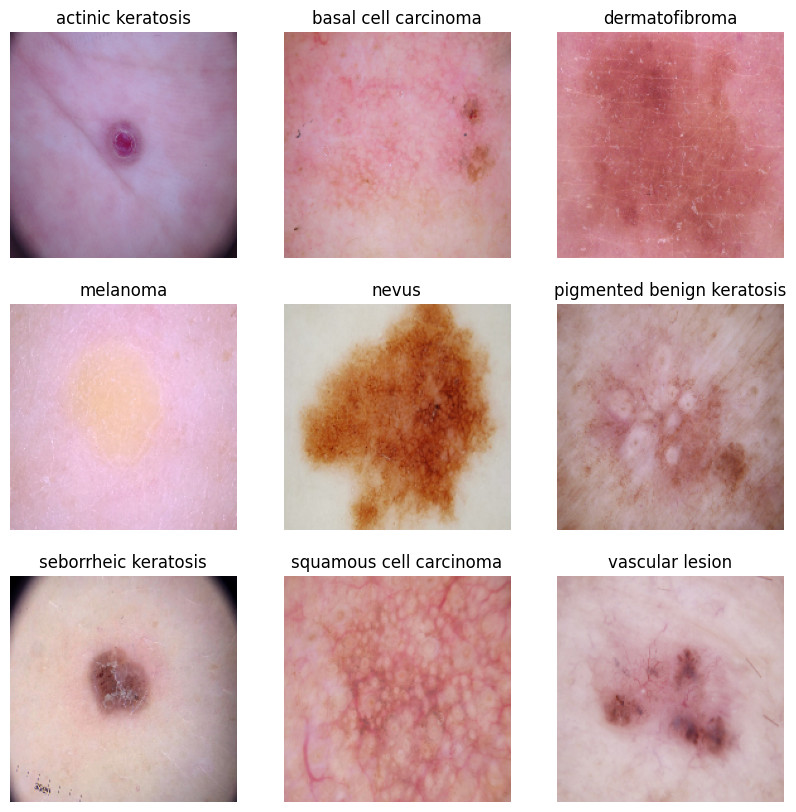

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")
    #print(class_names[i])


In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
####  Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
num_classes=9
model= Sequential([
       tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
       # adding the first convolving layer
       layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Adding the second convolving layer
       layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Adding the third convolving layer
       layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Dropout layer with 50% Fraction of the input units to drop.
       layers.Dropout(0.5),
       #adding the Flatten layer
       layers.Flatten(),
       # adding Dense layer
       layers.Dense(128, activation='relu'),
       #Dropout layer with 25% Fraction of the input units to drop.
       layers.Dropout(0.25),
       layers.Dense(num_classes)

])

### compiling the model

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

#### TRain the model

In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 349s 1s/step - loss: 1.9485 - accuracy: 0.3019 - val_loss: 1.6941 - val_accuracy: 0.3982
Epoch 2/20
56/56 [==============================] - 3s 55ms/step - loss: 1.6610 - accuracy: 0.4068 - val_loss: 1.5144 - val_accuracy: 0.4899
Epoch 3/20
56/56 [==============================] - 3s 58ms/step - loss: 1.5029 - accuracy: 0.4766 - val_loss: 1.4143 - val_accuracy: 0.5213
Epoch 4/20
56/56 [==============================] - 3s 54ms/step - loss: 1.4140 - accuracy: 0.5006 - val_loss: 1.3906 - val_accuracy: 0.5324
Epoch 5/20
56/56 [==============================] - 3s 56ms/step - loss: 1.3524 - accuracy: 0.5179 - val_loss: 1.3156 - val_accuracy: 0.5436
Epoch 6/20
56/56 [==============================] - 3s 53ms/step - loss: 1.2703 - accuracy: 0.5374 - val_loss: 1.3243 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 3s 59ms/step - loss: 1.2085 - accuracy: 0.5742 - val_loss: 1.4580 - val_accuracy: 0.4944
Epoch 8/20
56

#### The model is overfitted , there is a wide difference accutacy of training and validation
#### accuracy: accuracy: 0.7673 - val_accuracy: 0.5638



#### Using Augmentation to build the Model the second Model

### Visualizing training results

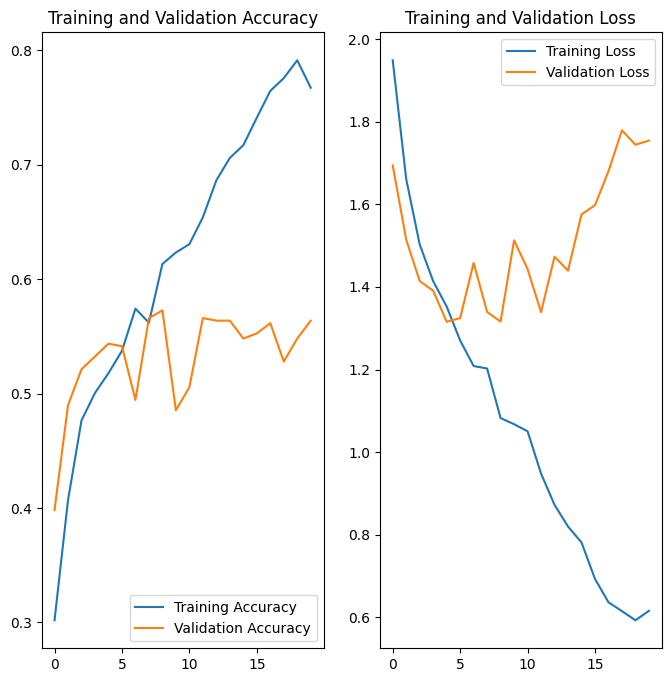

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Tends to overfit

### visualisation for train data to Check imbalance


In [22]:
def class_dist_cnt(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'Number of Image'])

df = class_dist_cnt(data_dir_train)
df

,Class,Number of Image
0,vascular lesion,139
1,actinic keratosis,114
2,basal cell carcinoma,376
3,dermatofibroma,95
4,melanoma,438
5,nevus,357
6,pigmented benign keratosis,462
7,seborrheic keratosis,77
8,squamous cell carcinoma,181


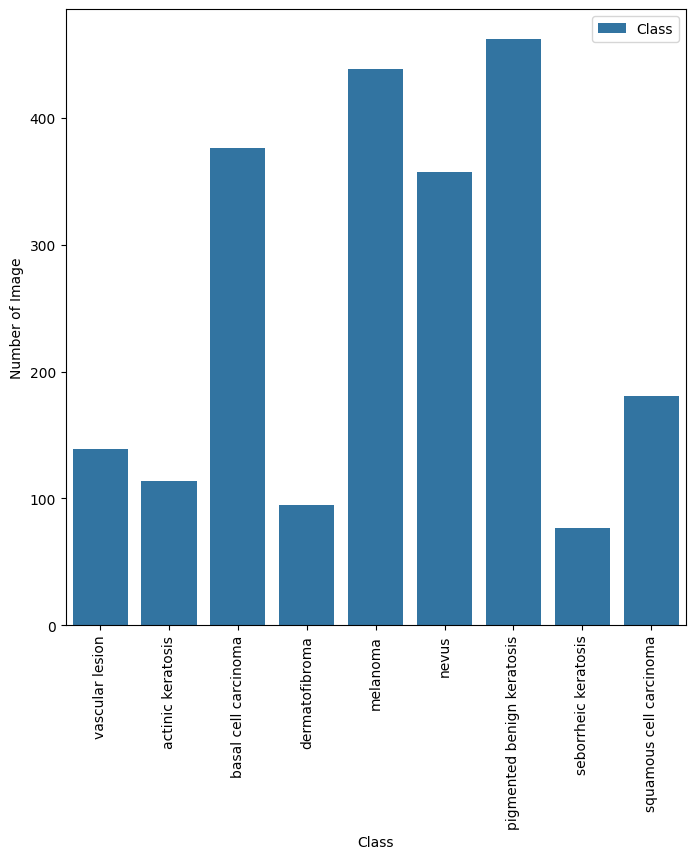

In [23]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.barplot(y="Number of Image", x="Class", data=df,
            label="Class")
plt.xticks(rotation=90)  # Rotate x-labels by 90 degrees
plt.show()

#### Findings
- The class seborrheic keratosis has least no of images i.e 77
- The class pigmented benign keratosis	has thee highest number of images i.e 462

In [24]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

#### Applying appropriate data augumentation strategy

In [25]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    tf.keras.layers.RandomCrop(img_height,img_width),
  ]
)

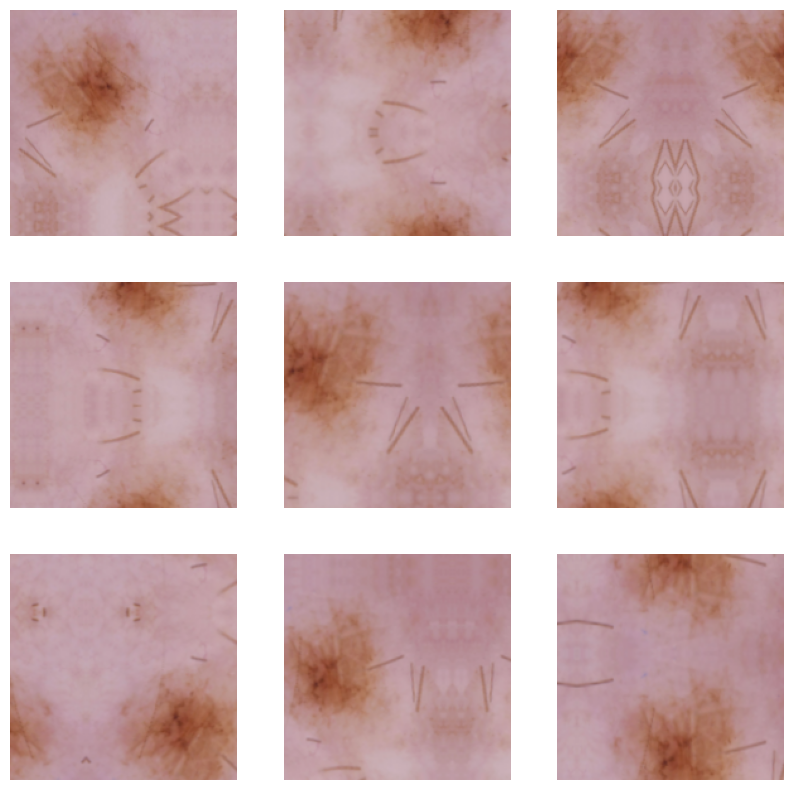

In [26]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Create the second model

In [27]:
num_classes=9
model= Sequential([
       data_augmentation,
       tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
       # adding the first convolving layer
       layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Adding the second convolving layer
       layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Adding the third convolving layer
       layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Dropout layer with 50% Fraction of the input units to drop.
       layers.Dropout(0.5),
       #adding the Flatten layer
       layers.Flatten(),
       # adding Dense layer
       layers.Dense(128, activation='relu'),
       #Dropout layer with 25% Fraction of the input units to drop.
       layers.Dropout(0.25),
       layers.Dense(num_classes)

])

### Compile The Model

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train The model

In [29]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 65ms/step - loss: 2.0700 - accuracy: 0.2115 - val_loss: 1.8807 - val_accuracy: 0.3579
Epoch 2/20
56/56 [==============================] - 3s 59ms/step - loss: 1.8278 - accuracy: 0.3186 - val_loss: 1.7121 - val_accuracy: 0.3937
Epoch 3/20
56/56 [==============================] - 3s 60ms/step - loss: 1.7820 - accuracy: 0.3326 - val_loss: 1.6849 - val_accuracy: 0.3781
Epoch 4/20
56/56 [==============================] - 3s 60ms/step - loss: 1.6989 - accuracy: 0.3672 - val_loss: 1.6741 - val_accuracy: 0.3736
Epoch 5/20
56/56 [==============================] - 3s 56ms/step - loss: 1.6687 - accuracy: 0.3571 - val_loss: 1.6597 - val_accuracy: 0.4116
Epoch 6/20
56/56 [==============================] - 3s 60ms/step - loss: 1.6869 - accuracy: 0.3923 - val_loss: 1.6079 - val_accuracy: 0.4072
Epoch 7/20
56/56 [==============================] - 3s 57ms/step - loss: 1.6256 - accuracy: 0.4118 - val_loss: 1.5005 - val_accuracy: 0.4541
Epoch 8/20
56

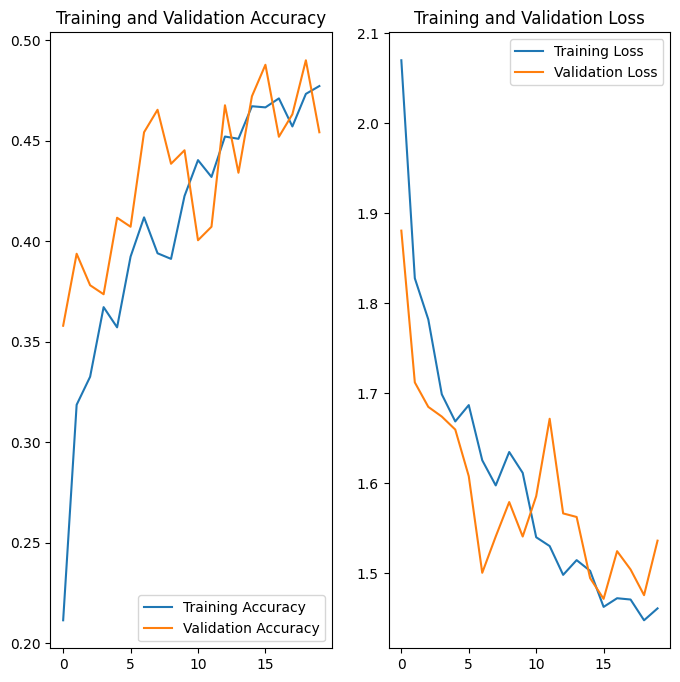

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### There is class imbalance, to overcome it we use Augmentor
### Model 2 has low Train and validation Accuracy


In [31]:
#install Augmentor
!pip install Augmentor

### To use `Augmentor`, the following general procedure is followed:

- 1. Instantiate a `Pipeline` object pointing to a directory containing your -initial image data set.<br>
- 2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
-3. Execute these operations by calling the `Pipeline’s` `sample()` method.

In [32]:
path_to_training_dataset = "gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E172760BB50>: 100%|██████████| 500/500 [00:22<00:00, 22.38 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E1725155360>: 100%|██████████| 500/500 [00:21<00:00, 22.81 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E17253F8B20>: 100%|██████████| 500/500 [00:18<00:00, 27.20 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2816x2112 at 0x7E17277A42B0>: 100%|██████████| 500/500 [01:20<00:00,  6.18 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7E17250909D0>: 100%|██████████| 500/500 [01:20<00:00,  6.23 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E17253F8B20>: 100%|██████████| 500/500 [00:18<00:00, 27.76 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E17245A4610>: 100%|██████████| 500/500 [00:37<00:00, 13.18 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E1725091090>: 100%|██████████| 500/500 [00:18<00:00, 27.64 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E1725442E00>: 100%|██████████| 500/500 [00:19<00:00, 25.90 Samples/s]


In [33]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
1,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
2,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
3,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
4,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
...,...,...
2234,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,squamous cell carcinoma
2235,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,squamous cell carcinoma
2236,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,squamous cell carcinoma
2237,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,squamous cell carcinoma


In [34]:
# Using the glob to retrieve files/pathnames matching a specified pattern.
#Train Image count
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [35]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [36]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [37]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [38]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [39]:
df1 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df1.head()

,Path,Label
0,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
1,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
2,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
3,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion
4,gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC...,vascular lesion


In [40]:
new_df = pd.concat([original_df,df1],ignore_index=True)

In [41]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

In [42]:
data_dir_train = "gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

### creating a training dataset

In [43]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset


In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Creating model after data imbalance handling with data Augmentor


In [45]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [46]:
num_classes=9
model= Sequential([
       tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
       # adding the first convolving layer
       layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       # adding the second convolving layer
       layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       #Adding the third convolving layer
       layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       #Dropout layer with 50% Fraction of the input units to drop.
       layers.Dropout(0.25),

       #adding the Flatten layer
       layers.Flatten(),

       # adding Dense layer
       layers.Dense(128, activation='relu'),

       #Dropout layer with 25% Fraction of the input units to drop.
       layers.Dropout(0.25),
       layers.Dense(num_classes)

])

### Model Summary

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)      

#### Compiling the model

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [49]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 50s 98ms/step - loss: 2.0074 - accuracy: 0.2285 - val_loss: 1.7039 - val_accuracy: 0.3593
Epoch 2/30
169/169 [==============================] - 9s 50ms/step - loss: 1.6261 - accuracy: 0.3783 - val_loss: 1.3855 - val_accuracy: 0.4722
Epoch 3/30
169/169 [==============================] - 9s 50ms/step - loss: 1.4264 - accuracy: 0.4605 - val_loss: 1.3944 - val_accuracy: 0.5048
Epoch 4/30
169/169 [==============================] - 8s 50ms/step - loss: 1.2796 - accuracy: 0.5239 - val_loss: 1.2242 - val_accuracy: 0.5471
Epoch 5/30
169/169 [==============================] - 9s 51ms/step - loss: 1.1670 - accuracy: 0.5686 - val_loss: 1.1106 - val_accuracy: 0.5828
Epoch 6/30
169/169 [==============================] - 9s 50ms/step - loss: 1.0874 - accuracy: 0.5903 - val_loss: 1.0396 - val_accuracy: 0.6110
Epoch 7/30
169/169 [==============================] - 9s 51ms/step - loss: 0.9485 - accuracy: 0.6484 - val_loss: 1.1497 - val_accuracy: 0.578

### Validation

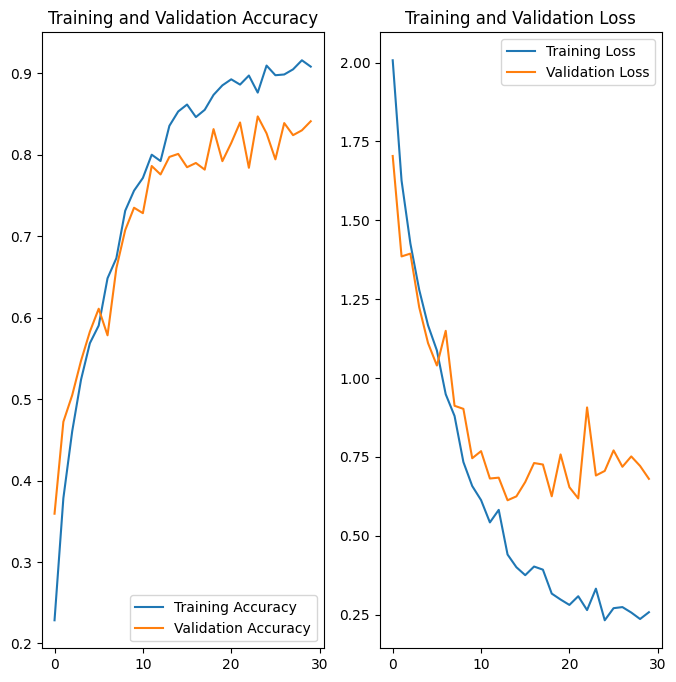

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The model fits well
- The last accuracy and loss are
- accuracy: 0.9082 - val_loss: 0.6803 - val_accuracy: 0.8411
- Handling class imbalance using Augmentor has improved the performance of the model.



### Model Prediction

In [51]:
from tensorflow.keras.preprocessing.image import load_img

1/1 [==============================] - 0s 343ms/step
Actual Class pigmented benign keratosis
Predictive Class pigmented benign keratosis


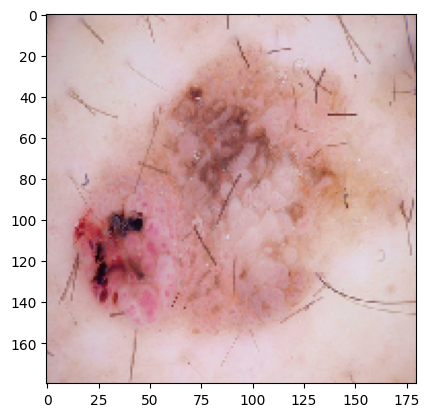

In [52]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[5], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[5] +'\n'+ "Predictive Class "+pred_class )

1/1 [==============================] - 0s 20ms/step
Actual Class vascular lesion
Predictive Class vascular lesion


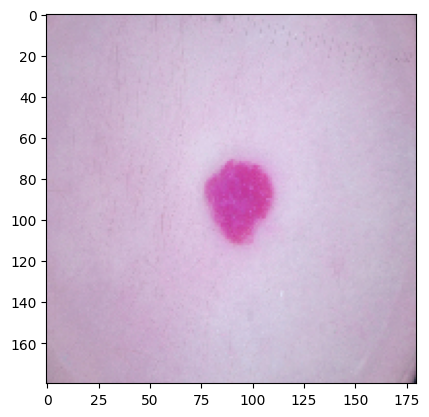

In [53]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[8], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[8] +'\n'+ "Predictive Class "+pred_class )

1/1 [==============================] - 0s 17ms/step
Actual Class nevus
Predictive Class nevus


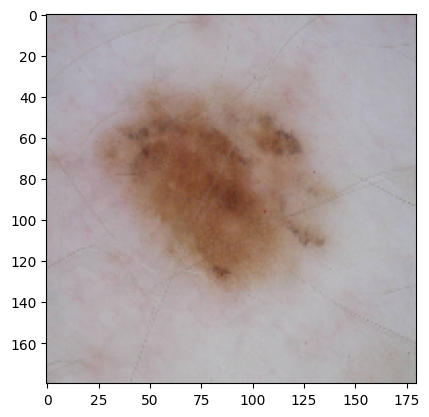

In [54]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[4], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[4] +'\n'+ "Predictive Class "+pred_class )

1/1 [==============================] - 0s 24ms/step
Actual Class melanoma
Predictive Class melanoma


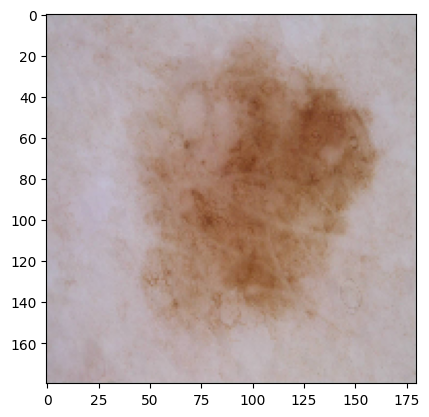

In [58]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[3], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[3] +'\n'+ "Predictive Class "+pred_class )

#### Handling class imbalance has improved the train and validation accuracy.
- accuracy: 0.9082 -val_accuracy: 0.8411
#### Also Model was able to predict the class of image correctly.